**Buscando e armazenando as planilhas**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#Importando as planilhas para a analise em Python
dfCupons = pd.read_csv("https://raw.githubusercontent.com/2025-2-NCC4/Projeto11/refs/heads/main/documentos/Entrega%201/Projeto%20Interdisciplinar%20-%20Ci%C3%AAncia%20de%20dados/Base%20de%20Dados/PicMoney-Base_de_Transa__es_-_Cupons_Capturados-100000%20linhas%20(1).csv", sep=";")
dfBaseCadastral = pd.read_csv("https://raw.githubusercontent.com/2025-2-NCC4/Projeto11/refs/heads/main/documentos/Entrega%201/Projeto%20Interdisciplinar%20-%20Ci%C3%AAncia%20de%20dados/Base%20de%20Dados/PicMoney-Base_Cadastral_de_Players-10_000%20linhas%20(1).csv", sep=";")
dfBasePedestres = pd.read_csv("https://raw.githubusercontent.com/2025-2-NCC4/Projeto11/refs/heads/main/documentos/Entrega%201/Projeto%20Interdisciplinar%20-%20Ci%C3%AAncia%20de%20dados/Base%20de%20Dados/PicMoney-Base_Simulada_-_Pedestres_Av__Paulista-100000%20linhas%20(1).csv", sep=";")
dfMassaTeste = pd.read_csv("https://raw.githubusercontent.com/2025-2-NCC4/Projeto11/refs/heads/main/documentos/Entrega%201/Projeto%20Interdisciplinar%20-%20Ci%C3%AAncia%20de%20dados/Base%20de%20Dados/PicMoney-Massa_de_Teste_com_Lojas_e_Valores-10000%20linhas%20(1).csv", sep=";")

**Base de Transações - Cupons Capturados**

**Limpeza dos dados**

In [2]:
dfCupons.head(10)
#Remover categorias redundantes
#print(dfCupons["categoria_estabelecimento"].value_counts())
#Colocando os estabelecimentos nas categorias certas

farmacias = ('Drogasil', 'Drogaria São Paulo', 'Droga Raia')
clinicasMed = ('Sabin', 'Lavoisier', 'Fleury')
roupasCal = ('Renner', 'Forever 21', 'Riachuelo')
restaurantes = ('Ráscal', 'Churrascaria Boi Preto', 'Madero', 'Outback')
academias = ('Smart Fit', 'Selfit')
cultural = ('Sesc Carmo', 'Sesc Paulista')
supermercado = ('Extra', 'Pão de Açúcar', 'Carrefour Express')
clubes = ('Clube Pinheiros',)
modaAlt = ('Just Run',)
cafeterias = ('Octavio Café', 'Café Cultura', 'Starbucks')
fastfood = ('Açaí no Ponto', "McDonald's", "Habib's", 'Subway', 'Burger King')
movelDeco = ('Casas Bahia', 'Magazine Luiza', 'Ponto')

for category, category_name in [
    (farmacias, 'Farmácias e Drogarias'),
    (clinicasMed, 'Clínicas Médicas e Laboratórios'),
    (roupasCal, 'Lojas de Roupas e Calçados'),
    (restaurantes, 'Restaurantes e Gastronomia'),
    (academias, 'Academias e Studios Fitness'),
    (cultural, 'Espaços Culturais e de Experiência Interativa'),
    (supermercado, 'Supermercados e Mercados Express'),
    (clubes, 'Clubes e Centros de Convivência'),
    (modaAlt, 'Lojas de Moda Urbana e Alternativa'),
    (cafeterias, 'Cafeterias e Bistrôs Modernos'),
    (fastfood, 'Lanchonetes e Fast-Food'),
    (movelDeco, 'Lojas de Eletrodomésticos e Utilidades Domésticas')
]:
    for estabelecimento in category:
        dfCupons.loc[dfCupons['nome_estabelecimento'] == estabelecimento, 'categoria_estabelecimento'] = category_name

dfCupons['categoria_estabelecimento'].value_counts()

categoria_estabelecimento
Lanchonetes e Fast-Food                              13338
Farmácias e Drogarias                                12957
Restaurantes e Gastronomia                           11566
Clínicas Médicas e Laboratórios                       9496
Lojas de Roupas e Calçados                            9442
Cafeterias e Bistrôs Modernos                         9371
Supermercados e Mercados Express                      9252
Academias e Studios Fitness                           6255
Espaços Culturais e de Experiência Interativa         6232
Lojas de Eletrodomésticos e Utilidades Domésticas     5937
Clubes e Centros de Convivência                       3084
Lojas de Moda Urbana e Alternativa                    3070
Name: count, dtype: int64

**Explorando os dados**

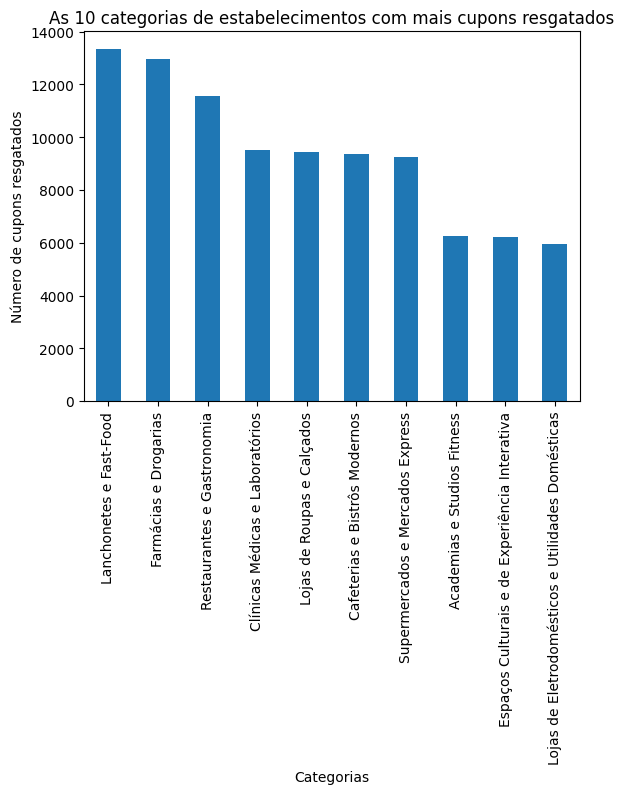

In [3]:
#Coluna produto inutilizavel
#Estabelecimentos com mais cupons resgatados
countEst = dfCupons['categoria_estabelecimento'].value_counts()
countEst10 = countEst.head(10)
countEst10.plot(kind='bar')
plt.title('As 10 categorias de estabelecimentos com mais cupons resgatados')
plt.xlabel('Categorias')
plt.ylabel('Número de cupons resgatados')

plt.show()

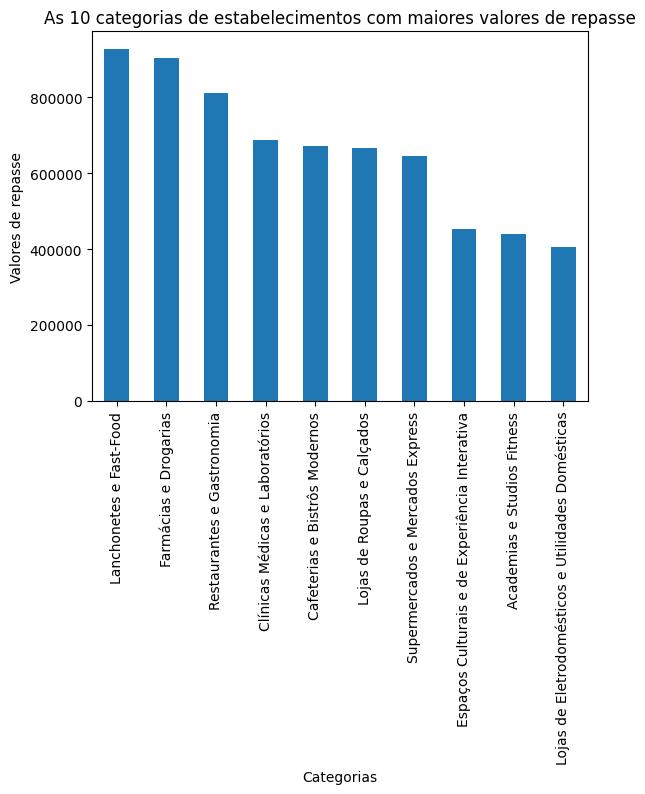

In [4]:
#Valores repassados a PicMoney por categoria de estabelecimentos
valorestabelecimentos = dfCupons.groupby('categoria_estabelecimento')['repasse_picmoney'].sum()
valorestabelecimentos10 = valorestabelecimentos.sort_values(ascending=False).head(10)
valorestabelecimentos10.plot(kind='bar')
plt.title('As 10 categorias de estabelecimentos com maiores valores de repasse')
plt.xlabel('Categorias')
plt.ylabel('Valores de repasse')

plt.show()

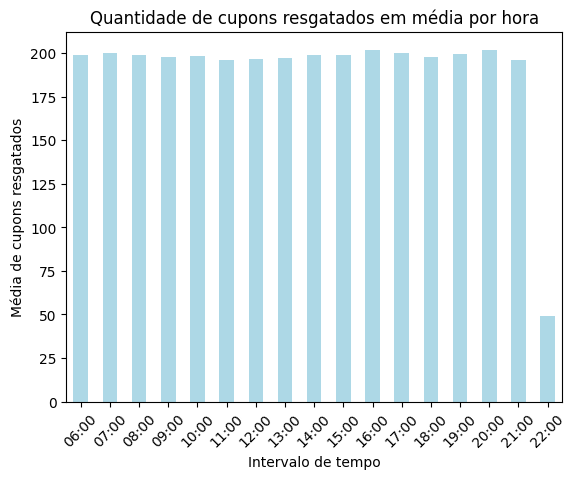

In [5]:
# Converte a coluna hora para o formato datetime
dfCupons['hora'] = pd.to_datetime(dfCupons['hora'], format='%H:%M:%S')

# Cria uma coluna que arredonda o horario pela hora
dfCupons['intervalo_tempo'] = dfCupons['hora'].dt.floor('h')

# Converte intervalo_tempo para mostrar somente as horas e minutos
dfCupons['intervalo_tempo_str'] = dfCupons['intervalo_tempo'].dt.strftime('%H:%M')

# Calcula a media de cupons resgatados por hora
quantCupMed = dfCupons.groupby('intervalo_tempo_str').size() / 31

quantCupMed.plot(kind='bar', color='lightblue')

plt.title('Quantidade de cupons resgatados em média por hora')
plt.xlabel('Intervalo de tempo')
plt.ylabel('Média de cupons resgatados')

plt.xticks(rotation=45)

plt.show()

In [6]:
#Porcentagem do repasse da PicMoney em relação ao valor total dos cupons
dfValorCupomTotal = dfCupons["valor_cupom"].sum()
dfRepassePicMoney = dfCupons["repasse_picmoney"].sum()
porcenCupomRep = dfRepassePicMoney/dfValorCupomTotal
print(porcenCupomRep)

0.1280219299000787


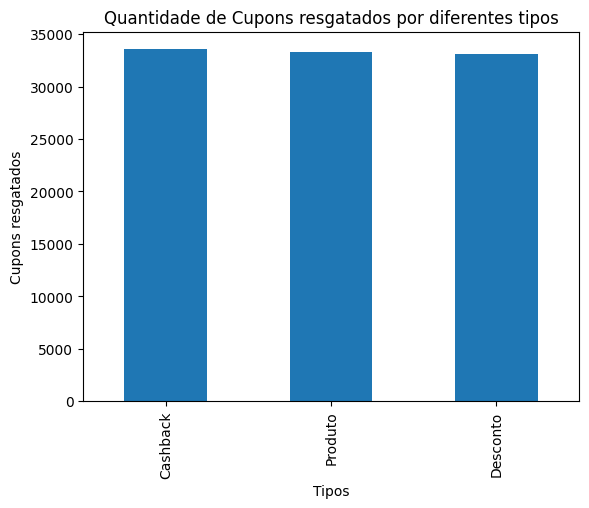

In [7]:
tipoCupom = dfCupons['tipo_cupom'].value_counts()
tipoCupom.plot(kind='bar')
plt.title('Quantidade de Cupons resgatados por diferentes tipos')
plt.xlabel('Tipos')
plt.ylabel('Cupons resgatados')

plt.show()

In [8]:
#Porcentagem do repasse da PicMoney em relação ao preço total do cupom
dfValorCupomTotal = dfCupons["valor_cupom"].sum()
dfRepassePicMoney = dfCupons["repasse_picmoney"].sum()
porcenCupomRep = dfRepassePicMoney/dfValorCupomTotal
print(porcenCupomRep)

0.1280219299000787


**Verificando a Qualidade dos dados**

In [9]:
#Verifica os produtos presentes na coluna produto
tamanho = len(dfCupons['produto'])
vazio = dfCupons['produto'].isna().sum()
print(vazio/tamanho*100)
#66% da coluna produto está vazia

66.672


In [10]:
dfCupons['produto'].value_counts().head(10)
#Os produtos presentes na coluna produto, são trechos do lorem ipsum

produto
Odio           212
Cum            211
Repudiandae    209
Ea             208
Fugiat         208
Odit           206
Quo            205
Fuga           205
Ad             205
Quia           205
Name: count, dtype: int64

In [11]:
#Remove a coluna produto
dfCupons.drop(columns='produto')

,celular,data,hora,nome_estabelecimento,bairro_estabelecimento,categoria_estabelecimento,id_campanha,id_cupom,tipo_cupom,valor_cupom,repasse_picmoney,intervalo_tempo,intervalo_tempo_str
0,(61) 96497-8673,10/07/2025,1900-01-01 16:15:00,Habib's,República,Lanchonetes e Fast-Food,CAM2768,CUP542835,Cashback,229.64,11.48,1900-01-01 16:00:00,16:00
1,(11) 94231-6424,15/07/2025,1900-01-01 08:15:00,Smart Fit,Vila Prudente,Academias e Studios Fitness,CAM6679,CUP291620,Cashback,356.33,17.82,1900-01-01 08:00:00,08:00
2,(11) 97965-2178,20/07/2025,1900-01-01 16:45:00,Outback,Tucuruvi,Restaurantes e Gastronomia,CAM6473,CUP670811,Produto,719.06,27.61,1900-01-01 16:00:00,16:00
3,(11) 93418-4646,20/07/2025,1900-01-01 15:45:00,Subway,Penha,Lanchonetes e Fast-Food,CAM8293,CUP590364,Produto,798.34,25.85,1900-01-01 15:00:00,15:00
4,(11) 97973-1725,07/07/2025,1900-01-01 11:00:00,Octavio Café,Santo Amaro,Cafeterias e Bistrôs Modernos,CAM5588,CUP528033,Produto,718.45,28.85,1900-01-01 11:00:00,11:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,(21) 95319-5062,27/07/2025,1900-01-01 09:00:00,Droga Raia,Penha,Farmácias e Drogarias,CAM1614,CUP400268,Desconto,863.65,310.22,1900-01-01 09:00:00,09:00
99996,(11) 92043-7072,05/07/2025,1900-01-01 06:45:00,Clube Pinheiros,Ipiranga,Clubes e Centros de Convivência,CAM7293,CUP137216,Desconto,251.03,64.32,1900-01-01 06:00:00,06:00
99997,(11) 96610-1439,06/07/2025,1900-01-01 15:45:00,Outback,Vila Prudente,Restaurantes e Gastronomia,CAM3065,CUP551535,Cashback,160.48,8.02,1900-01-01 15:00:00,15:00
99998,(11) 92639-5993,02/07/2025,1900-01-01 18:45:00,Açaí no Ponto,Jabaquara,Lanchonetes e Fast-Food,CAM3552,CUP390792,Desconto,665.09,124.46,1900-01-01 18:00:00,18:00


**Massa Teste com loja e valores**

**Verificando a qualidade dos dados**

In [12]:
#Lojas não correspondem com o tipo verdadeiro delas
dfMassaTeste[['tipo_loja', 'nome_loja']]

,tipo_loja,nome_loja
0,outros,Pão de Açúcar
1,móveis,Pão de Açúcar
2,móveis,Kalunga
3,vestuário,Daiso Japan
4,outros,Smart Fit
...,...,...
9995,móveis,Fast Shop
9996,outros,Kalunga
9997,móveis,Renner
9998,vestuário,Kalunga


**Limpeza dos dados**

In [13]:
#Organizando as lojas em suas categorias corretas
categories = [
    ('vestuário', 'Havaianas', 'Riachuelo', 'Renner', 'Lojas Americanas'),
    ('outros', 'Livraria Cultura', 'Smart Fit'),
    ('mercado express', 'Pão de Açúcar', 'Extra Mercado'),
    ('farmácia', 'Drogaria São Paulo'),
    ('eletrodoméstico', 'Ponto Frio', 'Kalunga'),
    ('móveis', 'Daiso Japan', 'Fast Shop'),
    ('restaurante', 'Outback', 'Subway')
]

for category_name, *stores in categories:
    for store in stores:
        dfMassaTeste.loc[dfMassaTeste['nome_loja'] == store, 'tipo_loja'] = category_name
dfMassaTeste['tipo_loja'].value_counts()

tipo_loja
vestuário          2683
eletrodoméstico    1381
mercado express    1359
móveis             1330
outros             1302
restaurante        1262
farmácia            683
Name: count, dtype: int64

In [14]:
#Função para converter a latiude e longitude em formatos validos
def reconstruct_lat(value):
    val_str = str(value)

    # Remove os pontos e troca a virgula por um ponto
    val_str = val_str.replace(".", "").replace(",", ".")

    try:
        num = float(val_str)

        # Divide por dez até chegar no range de latitude/longitude valido
        while abs(num) > 90:
            num /= 10

        return num
    except:
        return None

In [15]:
#Utiliza a função acima para realizar a conversão e criar novas colunas
dfMassaTeste["latitude_limpa"] = dfMassaTeste["latitude"].apply(reconstruct_lat)
dfMassaTeste["longitude_limpa"] = dfMassaTeste["longitude"].apply(reconstruct_lat)

print(dfMassaTeste[["latitude", "latitude_limpa", "longitude_limpa"]].head(20))

                   latitude  latitude_limpa  longitude_limpa
0   -23.563.850.985.754.000      -23.563851       -46.650041
1    -2.356.380.569.343.850      -23.563806       -46.649543
2   -23.563.227.246.012.400      -23.563227       -46.652373
3    -2.356.152.623.615.530      -23.561526       -46.653770
4    -2.357.068.984.231.570      -23.570690       -46.645488
5   -23.562.139.025.307.800      -23.562139       -46.654140
6    -2.356.308.441.131.850      -23.563084       -46.652877
7   -23.564.517.475.349.700      -23.564517       -46.650169
8   -23.561.717.849.336.000      -23.561718       -46.655787
9   -23.562.272.407.222.600      -23.562272       -46.654424
10  -23.563.560.305.369.300      -23.563560       -46.650068
11  -23.563.991.741.538.500      -23.563992       -46.657426
12  -23.555.934.314.817.300      -23.555934       -46.661585
13  -23.556.116.298.073.200      -23.556116       -46.661505
14  -23.555.951.191.606.900      -23.555951       -46.661706
15   -2.356.419.251.198.

In [16]:
#Endereços na coluna endereco_loja não correspondem com o endereço das coordenadas
dfMassaTeste[["latitude_limpa", "longitude_limpa",'endereco_loja']]

,latitude_limpa,longitude_limpa,endereco_loja
0,-23.563851,-46.650041,"Rua Pamplona, 1704"
1,-23.563806,-46.649543,"Rua Pamplona, 1704"
2,-23.563227,-46.652373,"Rua Augusta, 2220"
3,-23.561526,-46.653770,"Shopping Pátio Paulista, Rua Treze de Maio, 1947"
4,-23.570690,-46.645488,"Av. Paulista, 2006"
...,...,...,...
9995,-23.561630,-46.654141,"Shopping Cidade São Paulo, Av. Paulista, 1230"
9996,-23.562890,-46.652032,"Rua Augusta, 2220"
9997,-23.561714,-46.653884,"Av. Paulista, 2230"
9998,-23.563587,-46.649886,"Rua Augusta, 2220"


**Explorando os Dados**

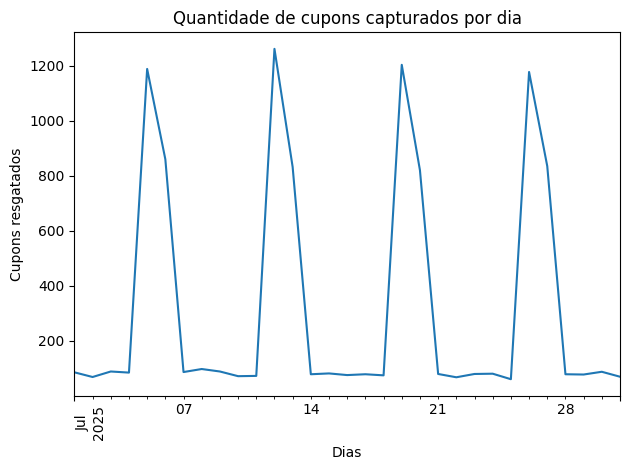

In [17]:
#Quantidade de cupons capturados por dia
dfMassaTeste['data_captura'] = pd.to_datetime(dfMassaTeste['data_captura'], dayfirst=True, errors="coerce")

dataCaptura = dfMassaTeste['data_captura'].value_counts().sort_index()
dataCaptura.plot(kind='line')
plt.title('Quantidade de cupons capturados por dia')
plt.xlabel('Dias')
plt.ylabel('Cupons resgatados')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [18]:
dfMassaTeste['data_captura'].value_counts()

data_captura
2025-07-12    1261
2025-07-19    1203
2025-07-05    1188
2025-07-26    1177
2025-07-06     860
2025-07-27     835
2025-07-13     832
2025-07-20     820
2025-07-08      98
2025-07-09      89
2025-07-03      89
2025-07-30      88
2025-07-07      87
2025-07-01      86
2025-07-04      85
2025-07-15      82
2025-07-24      81
2025-07-21      80
2025-07-23      80
2025-07-17      79
2025-07-14      79
2025-07-28      79
2025-07-29      78
2025-07-16      76
2025-07-18      75
2025-07-11      73
2025-07-10      72
2025-07-31      70
2025-07-02      69
2025-07-22      68
2025-07-25      61
Name: count, dtype: int64

**Base Simulada - Pedestres Av. Paulista**

**Limpeza dos dados**

In [19]:
#Convertendo as coordenadas para o formato valido utilizando a função criada anteriormente
dfBasePedestres["latitude_limpa"] = dfBasePedestres["latitude"].apply(reconstruct_lat)
dfBasePedestres["longitude_limpa"] = dfBasePedestres["longitude"].apply(reconstruct_lat)

print(dfBasePedestres[["latitude", "latitude_limpa", "longitude_limpa"]].head(20))

                   latitude  latitude_limpa  longitude_limpa
0   -23.567.430.342.750.400      -23.567430       -46.648443
1   -23.558.687.303.969.100      -23.558687       -46.658884
2   -23.570.847.016.535.100      -23.570847       -46.645782
3    -2.355.617.081.756.250      -23.556171       -46.661306
4    -2.356.254.630.989.870      -23.562546       -46.649567
5   -23.570.388.410.014.600      -23.570388       -46.645561
6   -23.561.531.245.538.800      -23.561531       -46.656090
7    -2.356.305.240.568.520      -23.563052       -46.652317
8   -23.564.332.854.063.000      -23.564333       -46.656973
9    -2.355.769.174.074.580      -23.557692       -46.659636
10  -23.558.057.344.416.300      -23.558057       -46.658959
11   -2.356.747.021.144.070      -23.567470       -46.648567
12   -2.356.425.189.706.960      -23.564252       -46.656395
13   -2.356.369.028.472.120      -23.563690       -46.656849
14  -23.558.516.567.675.600      -23.558517       -46.659090
15  -23.557.584.047.814.

In [20]:
#Padronizando os dados da tabela Base Pedestres com os dados da tabela de base cadastral
dfBasePedestres.loc[dfBasePedestres['ultimo_tipo_loja'] == 'restaurante', 'ultimo_tipo_loja'] = 'Restaurantes e Gastronomia'
dfBasePedestres.loc[dfBasePedestres['ultimo_tipo_loja'] == 'mercado express', 'ultimo_tipo_loja'] = 'Supermercados e Mercados Express'
dfBasePedestres.loc[dfBasePedestres['ultimo_tipo_loja'] == 'farmácia', 'ultimo_tipo_loja'] = 'Farmácias e Drogarias'
dfBasePedestres.loc[dfBasePedestres['ultimo_tipo_loja'] == 'esportivo', 'ultimo_tipo_loja'] = 'Clubes e Centros de Convivência'
dfBasePedestres.loc[dfBasePedestres['ultimo_tipo_loja'] == 'móveis', 'ultimo_tipo_loja'] = 'Lojas de Móveis e Decoração'
dfBasePedestres.loc[dfBasePedestres['ultimo_tipo_loja'] == 'vestuário', 'ultimo_tipo_loja'] = 'Lojas de Roupas e Calçados'
dfBasePedestres.loc[dfBasePedestres['ultimo_tipo_loja'] == 'eletrodoméstico', 'ultimo_tipo_loja'] = 'Lojas de Eletrodomésticos e Utilidades Domésticas'


**Explorando os dados**

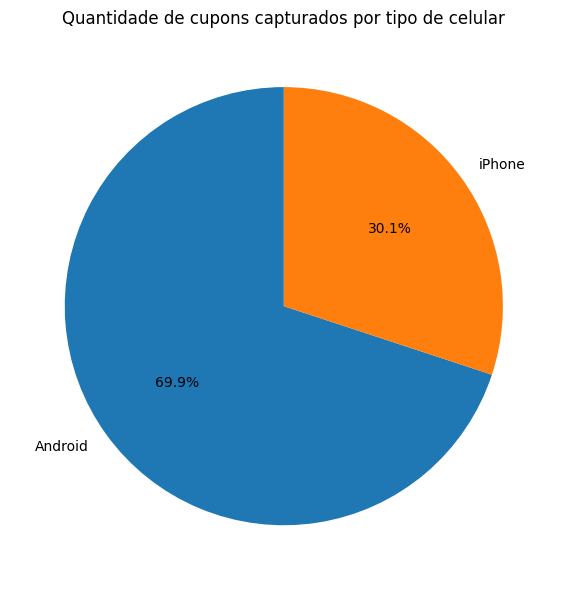

In [21]:
#Gráfico com o tipo de celular mais utilizado
tipoCelular = dfBasePedestres['tipo_celular'].value_counts().sort_index()

tipoCelular.plot(
    kind='pie',
    autopct='%1.1f%%',
    figsize=(6, 6),
    startangle=90
)

plt.title('Quantidade de cupons capturados por tipo de celular')
plt.ylabel('')
plt.xlabel('')
plt.tight_layout()
plt.show()

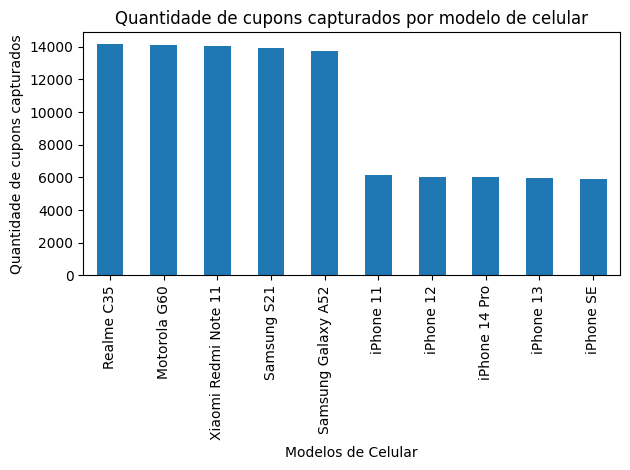

In [22]:
#Grafico com o modelo de celular mais utilizado
modeloCelular = dfBasePedestres['modelo_celular'].value_counts()

modeloCelular.plot(kind='bar')

plt.title('Quantidade de cupons capturados por modelo de celular')
plt.ylabel('Quantidade de cupons capturados')
plt.xlabel('Modelos de Celular')
plt.tight_layout()
plt.show()

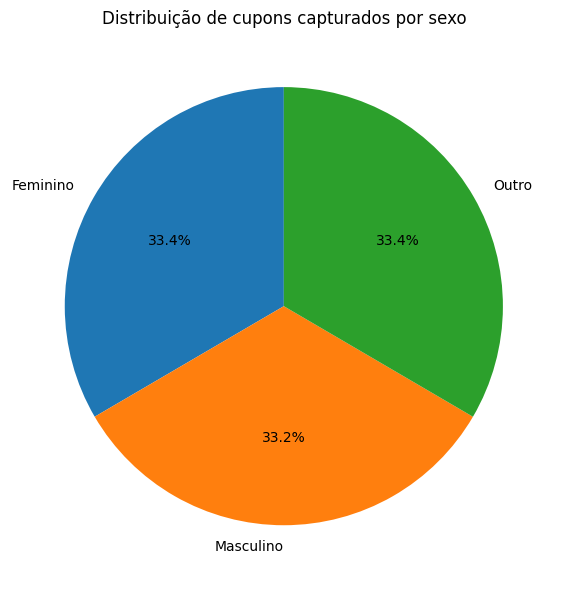

In [23]:
#Grafico com a distribuição por sexo
graficoSexo = dfBasePedestres['sexo'].value_counts().sort_index()

graficoSexo.plot(
    kind='pie',
    autopct='%1.1f%%',
    figsize=(6, 6),
    startangle=90
)

plt.title('Distribuição de cupons capturados por sexo')
plt.ylabel('')
plt.xlabel('')
plt.tight_layout()
plt.show()

In [24]:
#Média da idade na base de pedestres é de 43 anos
somaIdade = dfBasePedestres['idade'].sum()
tamanhoIdade = len(dfBasePedestres['idade'])
mediaIdade = somaIdade/tamanhoIdade
print(mediaIdade)

42.97314


In [25]:
#Valor Médio da ultima compra realizada é de R$254,80
valoresCompra = dfBasePedestres.loc[dfBasePedestres['ultimo_valor_capturado'].notnull()]
somaValores = valoresCompra['ultimo_valor_capturado'].sum()
quantValores = len(valoresCompra)
mediaValores = somaValores/quantValores
print(mediaValores)

254.7917887819604


**Base Cadastral Players**

**Verificar a qualidade dos dados**

In [26]:
#Verificando a quantidade de fileiras sem nenhum dado nas colunas cidade_trabalho, bairro_trabalho, cidade_escola, bairro_escola
colunas = ['cidade_trabalho','bairro_trabalho','cidade_escola','bairro_escola']
colunasVazias = dfBaseCadastral[colunas].isna().all(axis=1)
len(colunasVazias)

10000

**Explorar Dados**

In [27]:
dfBaseCadastral['cidade_residencial'].value_counts()

cidade_residencial
São Paulo            8967
Cardoso                16
Ramos                  15
Sales                  14
Silva                  13
                     ... 
da Cunha da Praia       1
Melo do Galho           1
da Cruz do Amparo       1
da Cunha do Campo       1
Duarte do Sul           1
Name: count, Length: 530, dtype: int64

In [28]:
#Faz a junção das tabelas da base cadastral e base de pedestres
dfMerge = pd.merge(dfBaseCadastral,dfBasePedestres,left_on="celular",right_on="celular",how="inner")

In [29]:
#Faz a mudança de não para sim na tabela de pedestres para os players que estão cadastrados
for index, row in dfMerge.iterrows():
    if row['possui_app_picmoney'] == 'Não':
        dfBasePedestres.loc[dfBasePedestres['celular'] == row['celular'], 'possui_app_picmoney'] = 'Sim'

#Codigo para adicionar pedestres que utilizaram o app da picmoney a base de cadastro
# Cria uma nova lista para armazenar os dados
new_rows = []

for index, row in dfBasePedestres.iterrows():
    exists = dfBaseCadastral['celular'] == row['celular']

    if row['possui_app_picmoney'] == 'Sim' and not exists.any():
        # Prepara a nova fila
        new_row = {
            'celular': row['celular'],
            'idade': row['idade'],
            'sexo': row['sexo'],
            'categoria_frequentada': row['ultimo_tipo_loja']
        }
        # Adiciona a lista
        new_rows.append(new_row)

if new_rows:
    dfBaseCadastral = pd.concat([dfBaseCadastral, pd.DataFrame(new_rows)], ignore_index=True)

In [30]:
#Juntando as tabelas Base Cadastral e Base de transações - Cupons Capturados
dfMerge2 = pd.merge(dfBaseCadastral,dfCupons,left_on="celular",right_on="celular",how="inner")
len(dfMerge2)
#Todos os celulares presentes na tabela de Cupons Capturados estão presentes na base cadastral

100011

In [31]:
len(dfBaseCadastral)

69949

In [32]:
#Juntando as tabelas Base Cadastral e Massa de Teste
dfMerge3 = pd.merge(dfBaseCadastral,dfMassaTeste,left_on="celular",right_on="numero_celular",how="inner")
#Codigo para adicionar pedestres que utilizaram o app da picmoney a base de cadastro
# Cria uma nova lista para armazenar os dados
new_rows = []

for index, row in dfMassaTeste.iterrows():
    # Check if the celular exists in dfBaseCadastral
    exists = dfBaseCadastral['celular'] == row['numero_celular']

    if not exists.any():
        # Prepara a nova fila
        new_row = {
            'celular': row['numero_celular'],
            'categoria_frequentada': row['tipo_loja']
        }
        # Adiciona a lista
        new_rows.append(new_row)

if new_rows:
    dfBaseCadastral = pd.concat([dfBaseCadastral, pd.DataFrame(new_rows)], ignore_index=True)

len(dfBaseCadastral)

79932

In [33]:
#Remove duplicatas da base cadastral
dfBaseCadastral = dfBaseCadastral.drop_duplicates(subset='celular', keep='first')

In [34]:
#Com a base cadastral corrigida é possivel concluir que:
#Média da idade é de 39 anos
somaIdadeCad = dfBaseCadastral['idade'].sum()
quantIdade = len(dfBaseCadastral['idade'].notnull())
mediaIdadeCad = somaIdadeCad/quantIdade
print(mediaIdadeCad)

38.816898588447295


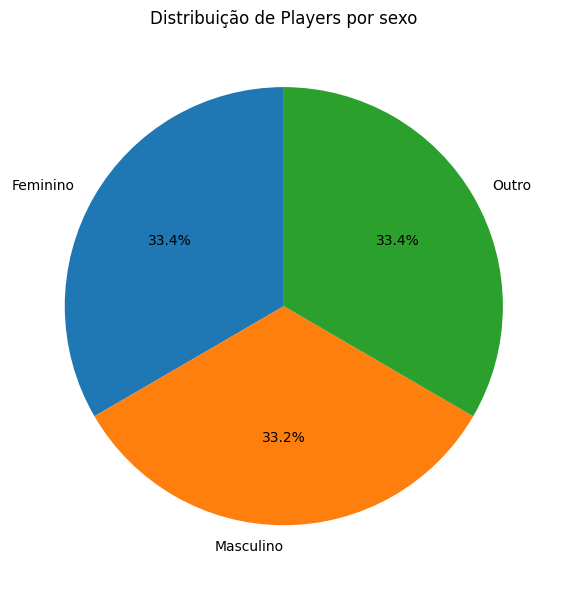

In [35]:
#Grafico com a distribuição por sexo na base cadastral
graficoSexoCad = dfBaseCadastral['sexo'].value_counts().sort_index()

graficoSexoCad.plot(
    kind='pie',
    autopct='%1.1f%%',
    figsize=(6, 6),
    startangle=90
)

plt.title('Distribuição de Players por sexo')
plt.ylabel('')
plt.xlabel('')
plt.tight_layout()
plt.show()

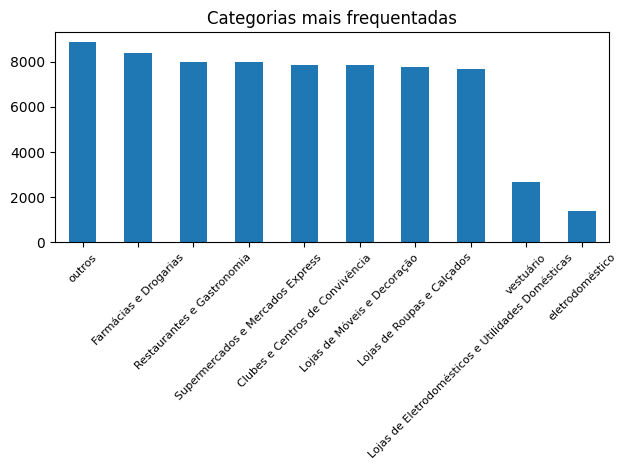

In [36]:
#Grafico as categorias mais frequentadas
categorias = dfBaseCadastral['categoria_frequentada'].value_counts()
categoriasTop = categorias.head(10)
categoriasTop.plot(kind='bar')

plt.title('Categorias mais frequentadas')
plt.xticks(fontsize=8, rotation=45)
plt.ylabel('')
plt.xlabel('')
plt.tight_layout()
plt.show()

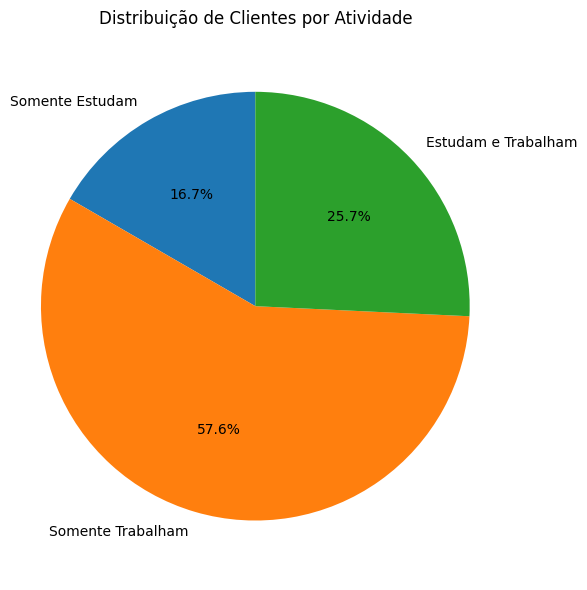

In [37]:
#Verificar quantos clientes trabalham, estudam ou fazem os dois
estuda = len(dfBaseCadastral.loc[(dfBaseCadastral['cidade_escola'].notnull()) & (dfBaseCadastral['cidade_trabalho'].isnull())])
trabalha = len(dfBaseCadastral.loc[(dfBaseCadastral['cidade_trabalho'].notnull()) & (dfBaseCadastral['cidade_escola'].isnull())])
estudaTrabalha = len(dfBaseCadastral.loc[(dfBaseCadastral['cidade_escola'].notnull()) & (dfBaseCadastral['cidade_trabalho'].notnull())])

labels = ['Somente Estudam', 'Somente Trabalham', 'Estudam e Trabalham']
sizes = [estuda, trabalha, estudaTrabalha]

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição de Clientes por Atividade')
plt.axis('equal')
plt.tight_layout()
plt.show()